<a href="https://colab.research.google.com/github/FatimaNsrn/route_difficulty_istinye/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import streamlit as st

df = pd.read_csv("cleaned_dataset (7).csv")


print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2328 non-null   int64 
 1   Origin        2328 non-null   object
 2   Destination   2328 non-null   object
 3   Time_Slot     2328 non-null   object
 4   travel_time   2328 non-null   int64 
 5   num_transits  2328 non-null   int64 
 6   buses         2328 non-null   int64 
 7   metros        2328 non-null   int64 
 8   ferries       2328 non-null   int64 
 9   Difficulty    2328 non-null   object
dtypes: int64(6), object(4)
memory usage: 182.0+ KB
None
        Unnamed: 0  travel_time  num_transits        buses       metros  \
count  2328.000000  2328.000000   2328.000000  2328.000000  2328.000000   
mean   1163.500000    92.871993      2.311426     2.151632     0.112543   
std     672.180035    46.113115      0.704585     0.720345     0.325479   
min       0.000000    18.000000 

In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,Origin,Destination,Time_Slot,travel_time,num_transits,buses,metros,ferries,Difficulty
0,"1. 19 Mayis, Büyükçekmece/Istanbul","Istinye University, Hamidiye, Kağthane, Istanbul",6pm-12am,206,3,3,0,0,Challenging
1,"1. 19 Mayis, Büyükçekmece/Istanbul","Istinye University, Hamidiye, Kağthane, Istanbul",12pm-6pm,181,4,4,0,0,Challenging
2,"1. 19 Mayis, Büyükçekmece/Istanbul","Istinye University, Hamidiye, Kağthane, Istanbul",6am-12pm,196,4,4,0,0,Challenging
3,"1. 19 Mayis, Kadiköy/Istanbul","Istinye University, Hamidiye, Kağthane, Istanbul",6am-12pm,98,2,2,0,0,Moderate
4,"1. 19 Mayis, Kadiköy/Istanbul","Istinye University, Hamidiye, Kağthane, Istanbul",12pm-6pm,85,3,2,0,0,Moderate


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['travel_time', 'num_transits', 'buses', 'metros', 'ferries']
Categorical Columns: ['Origin', 'Destination', 'Time_Slot', 'Difficulty']


In [ ]:

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Origin', 'Destination', 'Time_Slot','Difficulty']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
df.head()

,Origin,Destination,Time_Slot,travel_time,num_transits,buses,metros,ferries,Difficulty
0,0,0,2,206,3,3,0,0,1
1,0,0,0,181,4,4,0,0,1
2,0,0,1,196,4,4,0,0,1
3,1,0,1,98,2,2,0,0,2
4,1,0,0,85,3,2,0,0,2


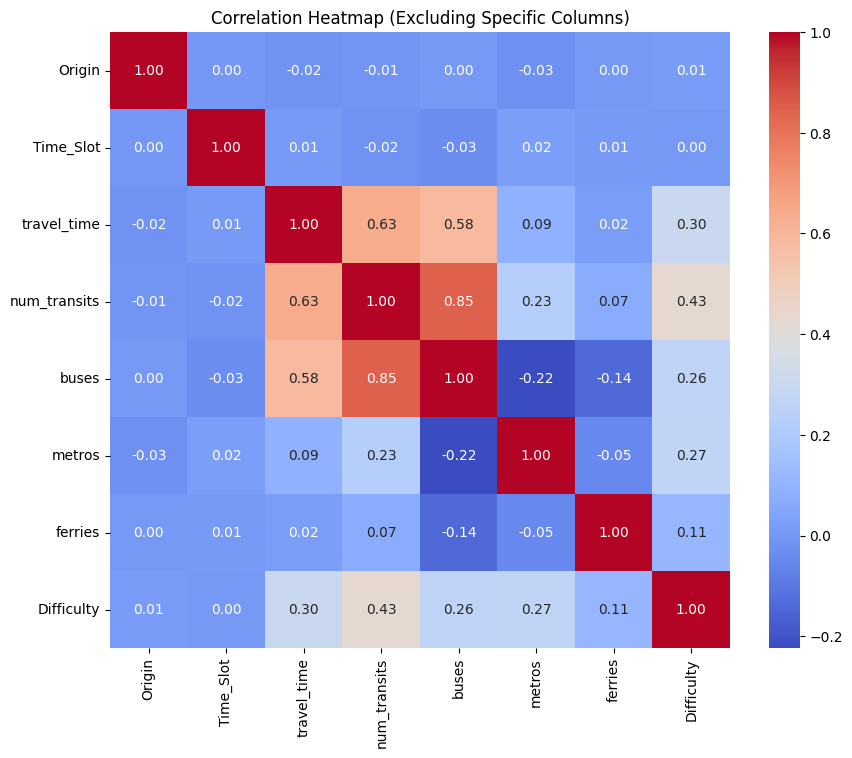

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_filtered = df.drop(columns=['Destination'])


plt.figure(figsize=(10, 8))
correlation_matrix = df_filtered.corr()  # Correlations for the remaining columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Excluding Specific Columns)")
plt.show()

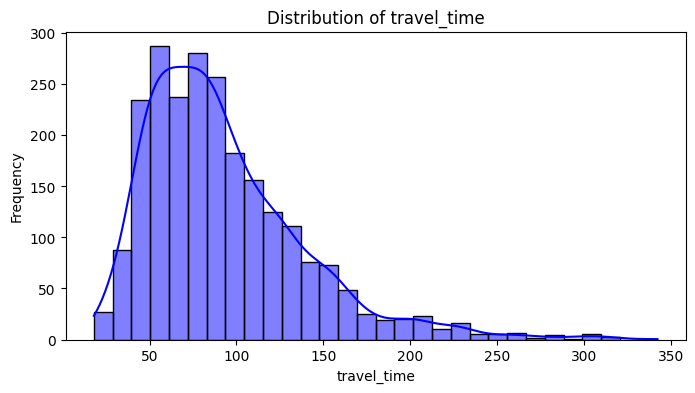

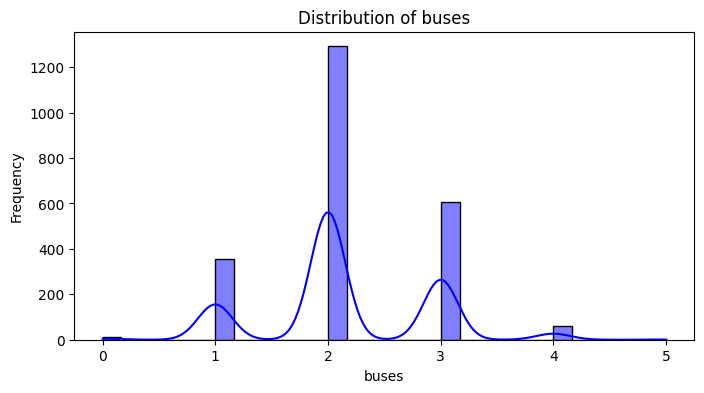

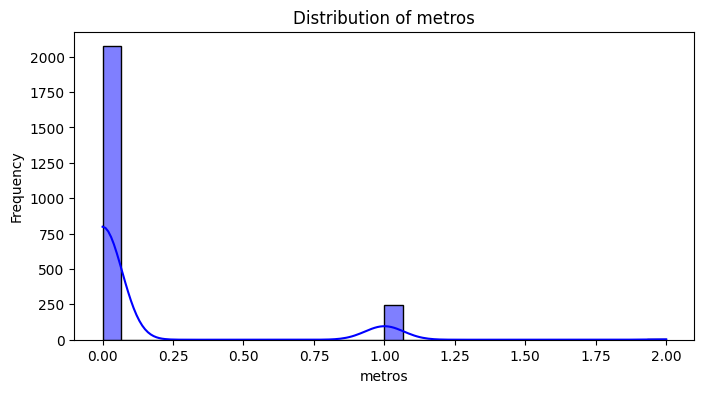

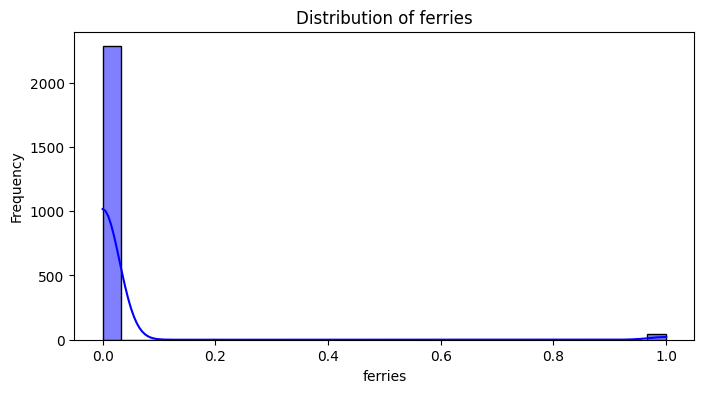

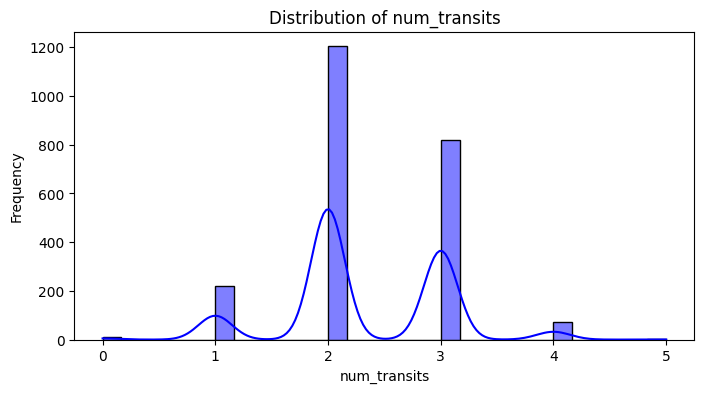

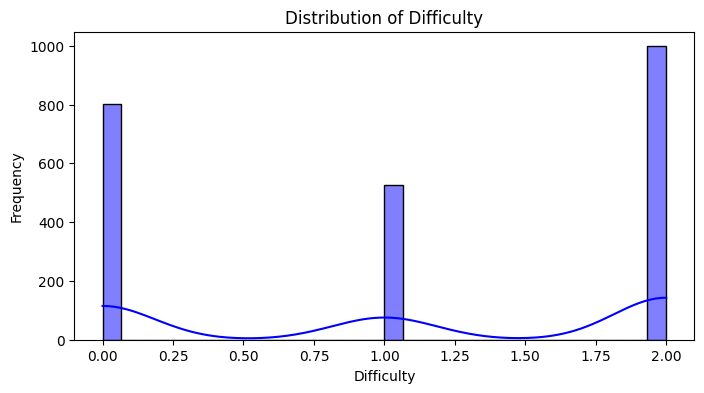

In [ ]:
df_selected = df[['travel_time', 'buses', 'metros', 'ferries', 'num_transits', 'Difficulty']]
for col in df_selected .columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_selected[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df[['Origin', 'Destination', 'Time_Slot','travel_time', 'num_transits', 'buses', 'metros', 'ferries']].values
y = df['Difficulty']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rf_default = RandomForestClassifier(random_state=42)
rf_default_cv_scores = cross_val_score(rf_default, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Random Forest (Default Parameters) - Cross-Validation Scores:", rf_default_cv_scores)
print("Random Forest (Default Parameters) - Mean Accuracy:", rf_default_cv_scores.mean())

Random Forest (Default Parameters) - Cross-Validation Scores: [0.99785408 1.         1.         1.         0.99784946]
Random Forest (Default Parameters) - Mean Accuracy: 0.999140707923762


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train)


print("Best Parameters:", random_search.best_params_)


y_pred = random_search.best_estimator_.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}

Classification Report:
               precision    recall  f1-score   support

  Accessible       1.00      1.00      1.00       154
 Challenging       1.00      1.00      1.00       132
    Moderate       1.00      1.00      1.00       180

    accuracy                           1.00       466
   macro avg       1.00      1.00      1.00       466
weighted avg       1.00      1.00      1.00       466



In [ ]:
print("Class Distribution in 'Difficulty':\n", df['Difficulty'].value_counts())

Class Distribution in 'Difficulty':
 Difficulty
Moderate       998
Accessible     803
Challenging    527
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
gb_default = GradientBoostingClassifier(random_state=42)
gb_default_cv_scores = cross_val_score(gb_default, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("\nGradient Boosting (Default Parameters) - Cross-Validation Scores:", gb_default_cv_scores)
print("Gradient Boosting (Default Parameters) - Mean Accuracy:", gb_default_cv_scores.mean())


Gradient Boosting (Default Parameters) - Cross-Validation Scores: [1.         1.         1.         1.         0.99569892]
Gradient Boosting (Default Parameters) - Mean Accuracy: 0.9991397849462367


In [ ]:

gb = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300],          # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      # Learning rate
    'max_depth': [3, 5, 7, 10],                   # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],              # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be a leaf node
    'subsample': [0.6, 0.8, 1.0],                 # Fraction of samples used for fitting individual trees
    'max_features': ['sqrt', 'log2', None]        # Number of features to consider when looking for the best split
}


random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)


y_pred = random_search.best_estimator_.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'learning_rate': 0.05}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       180

    accuracy                           1.00       466
   macro avg       1.00      1.00      1.00       466
weighted avg       1.00      1.00      1.00       466



In [ ]:
X = df.drop(columns=['Difficulty'])

Text(0, 0.5, 'Inertia')

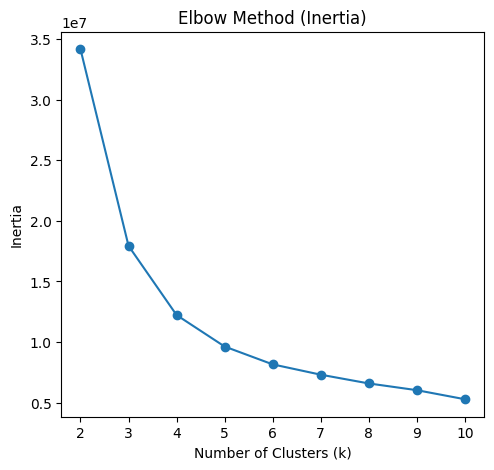

In [ ]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

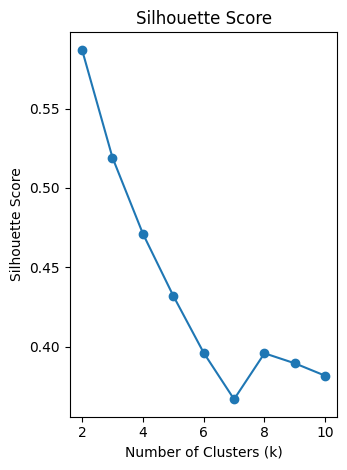

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

In [ ]:

print("Cluster Centers (scaled):\n", kmeans.cluster_centers_)

Cluster Centers (scaled):
 [[3.85500000e+02 0.00000000e+00 1.00000000e+00 9.30839793e+01
  2.28811370e+00 2.11627907e+00 1.26614987e-01 2.45478036e-02]
 [6.45000000e+02 0.00000000e+00 1.00000000e+00 9.16143040e+01
  2.31162197e+00 2.16858238e+00 9.57854406e-02 1.91570881e-02]
 [1.28000000e+02 0.00000000e+00 1.00000000e+00 9.39364462e+01
  2.33463035e+00 2.16990921e+00 1.15434501e-01 1.68612192e-02]]


In [ ]:
print("\nCluster Sizes:\n", df['Cluster'].value_counts())


Cluster Sizes:
 Cluster
1    780
0    777
2    771
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)

inertia = kmeans.inertia_

print(f'Silhouette Score: {silhouette_avg}')
print(f'Inertia: {inertia}')

Silhouette Score: 0.5191593658713913
Inertia: 17931747.25772791


In [ ]:
df.to_csv('clustered_dataset.csv', index=False)


Adjusted Rand Index (ARI): 0.00041416808429304446
Normalized Mutual Information (NMI): 0.0013754073720866524


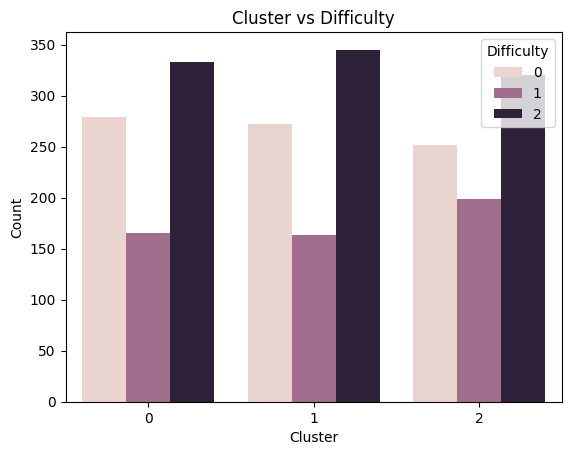

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt


ari_score = adjusted_rand_score(df['Difficulty'], df['Cluster'])
nmi_score = normalized_mutual_info_score(df['Difficulty'], df['Cluster'])

print("Adjusted Rand Index (ARI):", ari_score)
print("Normalized Mutual Information (NMI):", nmi_score)


sns.countplot(x='Cluster', hue='Difficulty', data=df)
plt.title("Cluster vs Difficulty")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Difficulty")
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.datasets import make_classification


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))





Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       154
           1       0.84      0.86      0.85       132
           2       0.83      0.84      0.84       180

    accuracy                           0.87       466
   macro avg       0.87      0.87      0.87       466
weighted avg       0.87      0.87      0.87       466



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from scipy.stats import uniform


logreg = LogisticRegression(max_iter=1000, random_state=42)


param_distributions = {
    'C': uniform(0.01, 10),
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l2'] if logreg.solver == 'lbfgs' else ['l1', 'l2', 'elasticnet'],
    'l1_ratio': uniform(0, 1) if 'elasticnet' in ['l1', 'elasticnet'] else [None],
}


random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)


random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best Parameters: {'C': 9.705846277645586, 'l1_ratio': 0.7751328233611146, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.972609472743521

Test Set Accuracy: 0.9742489270386266

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       154
           1       1.00      0.97      0.98       132
           2       0.96      0.98      0.97       180

    accuracy                           0.97       466
   macro avg       0.98      0.97      0.98       466
weighted avg       0.97      0.97      0.97       466



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
